# Jordan Bird

## Research question/interests

Coming from a health sciences background, I’m interested in looking at a couple of different angles of this dataset:

I am interested in looking at the trends of cardiovascular disease (i.e., atrial fibrillation, heart failure, hypertension, ischemia heart disease, stroke or TIA) in the five US regions (i.e., West, Midwest, Southwest, Southeast, Northeast) and how it has changed over the 6 years of 2006-2012. This is the first step before correlating it to utilization of Medicare and Medicaid services to determine what percentage of the overall healthcare system is from cardiovascular disease. Hopefully we will be able to pinpoint areas of higher cardiovascular risk and tie it into historical census data for why higher cardiovascular disease rates may be higher in some areas of the country.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import project_functions1 as p1

## Data Cleaning

In [2]:
p1.connecting_unprocessed('../data/raw/group36_MedicareData.xlsx')

In [2]:
dfu = p1.unprocessed('../data/raw/data.csv')

#### Data Cleaning - Adding State Region column

In [3]:
dfu = p1.add_region_column(dfu)

#### Data Cleaning - Renaming columns

In [4]:
dfu = p1.rename_data(dfu)

#### Data Cleaning - Remove columns

In [5]:
dfu = p1.remove_columns(dfu)

#### Data Cleaning - Replace missing values with NaN

In [6]:
dfu = p1.missing_values(dfu)

#### Data Cleaning - Write .csv file to processed data folder

In [7]:
dfu.to_csv('../data/processed/c_data.csv', sep=',', na_rep='', index=False)

## Process Data

In [15]:
dfc = p1.cleaned_data('../data/processed/c_data.csv')

## Exploratory Data Analysis

In [10]:
print("Number of rows and columns respectively:", dfc.shape)
print("Columns in the dataset:", dfc.columns)

Number of rows and columns respectively: (1456, 52)
Columns in the dataset: Index(['Year', 'State', 'Region',
       'Number of People by Medicare-Medicaid Enrollment Type',
       'Number of People', 'Number of People with FFS',
       'Number of Females with FFS', 'Number of Males with FFS', 'A%_<40',
       'A%_40-64', 'A%_65-84', 'A%_85+', 'F%', 'M%', 'White%', 'AfrA%', 'His%',
       'Asian%', 'Indig%', 'Unknown%', 'ha%', 'af%', 'hf%', 'dm%', 'hc%',
       'hyp%', 'ihd%', 'strokeorTIA%', 'obesity%', 'pad%',
       'Number of FFS people who used Medicare procedures',
       'Number of FFS people who used Medicare imaging services',
       'Number of FFS people who used Medicare laboratory/testing services',
       'Number of FFS people who used Medicare durable medical equipment',
       'Number of people who used Medicare Part D prescription drugs',
       'Total Medicare payments', 'Total Medicare IP Hospital FFS payments',
       'Total Medicare Other IP Hospital FFS payments',


#### Cardiovascular Variable Summary

In [16]:
dfc[['ha%', 'af%', 'hf%', 'dm%', 'hc%', 'hyp%', 'ihd%', 'strokeorTIA%', 'obesity%', 'pad%']].describe().T

,count,mean,std,min,25%,50%,75%,max
ha%,1385.0,0.007931,0.002966,0.0001,0.006000,0.00820,0.009900,0.0209
af%,1436.0,0.047214,0.027135,0.0005,0.022125,0.05060,0.068425,0.1120
hf%,1446.0,0.133520,0.066907,0.0016,0.079400,0.13100,0.172000,0.3080
dm%,1456.0,0.229867,0.084025,0.0028,0.167000,0.24000,0.290000,0.4240
hc%,1444.0,0.269867,0.139578,0.0026,0.153000,0.29350,0.371000,0.6210
hyp%,1454.0,0.404431,0.169476,0.0008,0.248250,0.44900,0.548000,0.6710
ihd%,1450.0,0.211881,0.098325,0.0021,0.121000,0.23000,0.285000,0.4290
strokeorTIA%,1434.0,0.034349,0.018263,0.0030,0.021400,0.03100,0.041275,0.0984
obesity%,1446.0,0.065914,0.031175,0.0009,0.040325,0.06120,0.087075,0.1800
pad%,1440.0,0.084013,0.059851,0.0005,0.035700,0.07525,0.111000,0.3130


#### Analysis:
- The most amount of data is missing from heart attacks (presumably from passing away) while also occuring in the lowest persent of the population (0.79%).
- The most common cardiovascular issue is hypertension at 40.4% of this Medicare/Medicaid population
- In one row of data, 42.4% of the population came in with Diabetes Mellitus. That's a huge percent of any population but very insane in this case.
- As Peripheral Arterial Disease (PAD) is often a subset of Type 2 Diabetes Mellitus cases, it makes sense that in average cases, that PAD occurs in a lower percent of the population

#### Age and Ethnicity Summary

In [17]:
dfc[["A%_<40", "A%_40-64", "A%_65-84", "A%_85+", "F%", "M%", "White%", "AfrA%","His%","Asian%","Indig%","Unknown%"]].describe().T

,count,mean,std,min,25%,50%,75%,max
A%_<40,1448.0,0.180732,0.214602,0.0047,0.015000,0.08520,0.31775,0.728
A%_40-64,1448.0,0.305538,0.141785,0.0305,0.169000,0.33400,0.40825,0.675
A%_65-84,1092.0,0.564909,0.161310,0.2690,0.429000,0.52100,0.76100,0.833
A%_85+,1092.0,0.120036,0.043542,0.0359,0.087375,0.12300,0.14800,0.278
F%,1456.0,0.562986,0.057026,0.4350,0.517000,0.55500,0.61200,0.697
M%,1456.0,0.437014,0.057026,0.3030,0.388000,0.44500,0.48300,0.565
White%,1456.0,0.685083,0.222943,0.0069,0.510500,0.74750,0.86500,0.985
AfrA%,1437.0,0.159678,0.171398,0.0014,0.026200,0.09590,0.22000,0.897
His%,1381.0,0.030176,0.079633,0.0002,0.005200,0.01070,0.02210,0.609
Asian%,1403.0,0.063231,0.092205,0.0001,0.009000,0.02310,0.07525,0.521


#### Analysis
- For age categories, the mean percentage for age categories is >100% based on missing data from the 65-84 and 85+ groupings. This would most likely arise from Medicare not having this information for the 65+ crowd
- Of the data that is present, the majority is still skewed towards 65+ suggesting that there is a greater reliance that falls under Medicare than Medicaid.
- Women were more often enrolled (56.3%) presumably because there are a greater number of women alive, life expectancy is longer, and generally incomes are less which might make more women eligble for Medicaid.
- Not much can be gleaned from the ethnicity as this is not normalized to ethnicity population size year over year. To be able to get a true estimate, it would involve taking total participants and multiplying by ethnic percentage to get a total number of people enrolled in Medicare/Medicaid then dividing total number of people by the yearly national census numbers when controlling for ethnicity.

## Exploratory Data Analysis using National Averages and Year Trends

In [18]:
sns.set(style='darkgrid')

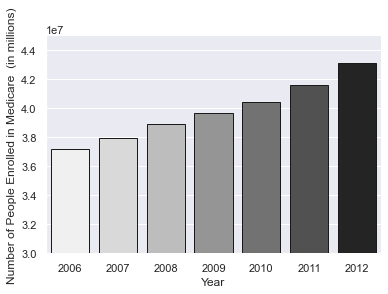

In [20]:
df_nation = dfc.loc[(dfc['State'] == 'National') & (dfc['Number of People by Medicare-Medicaid Enrollment Type'] == 'Medicare Only')]

fig, ax = plt.subplots()
sns.barplot(x='Year', y='Number of People', data=df_nation, palette='Greys', linewidth=1, edgecolor="k")
ax.set(ylim=(3e7,4.5e7), ylabel="Number of People Enrolled in Medicare  (in millions)")
sns.despine(bottom=True)

- Usage of Medicare increased by ~600,000 over the course of the 6 year period (rate increase of ~100,000/year)

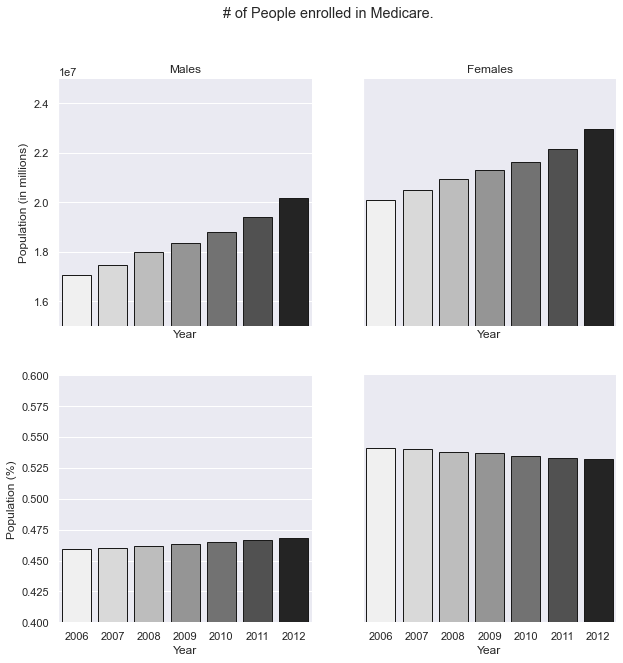

In [21]:
fig, ax = plt.subplots(2,2, sharex=True, figsize=(10,10))
num_males, num_females = df_nation['M%'] * df_nation['Number of People'], df_nation['F%'] * df_nation['Number of People']

fig.suptitle('# of People enrolled in Medicare.')

#Top Graphs
sns.barplot(ax=ax[0,0], x='Year', y=num_males, data=df_nation, palette='Greys', linewidth=1, edgecolor="k")
sns.barplot(ax=ax[0,1], x='Year', y=num_females, data=df_nation, palette='Greys', linewidth=1, edgecolor="k")

#Bottom Graphs
sns.barplot(ax=ax[1,0], x='Year', y='M%', data=df_nation, palette='Greys', linewidth=1, edgecolor="k")
sns.barplot(ax=ax[1,1], x='Year', y='F%', data=df_nation, palette='Greys', linewidth=1, edgecolor="k")

ax[0,0].set_title('Males')
ax[0,1].set_title('Females')
ax[0,0].set(ylim=(1e7,2.5e7), ylabel="Population (in millions)")
ax[1,0].set(ylim=(0,1), ylabel="Population (%)")

top_bounds, bottom_bounds = [1.5e7, 2.5e7], [0.4,0.6]
ax[0,0].set_ylim(top_bounds)
ax[0,1].set_ylim(top_bounds)
ax[1,0].set_ylim(bottom_bounds)
ax[1,1].set_ylim(bottom_bounds)

ax[0,1].get_yaxis().set_visible(False)
ax[1,1].get_yaxis().set_visible(False)

sns.despine(bottom=True)

plt.savefig('../images/Sex_Trends.png', dpi=300)

- While there was an increase in both males and females enrolled in Medicare, the ratio of males to females trended towards converging in the near future.
- This data is not particularly useful  as the net change for women and the net change for men is very different as they had similar enrollment increases for both sexes but the percentages differ based on a different starting baseline (1.7m vs 2m in 2006)

In [23]:
df_nation.head()

,Year,State,Region,Number of People by Medicare-Medicaid Enrollment Type,Number of People,Number of People with FFS,Number of Females with FFS,Number of Males with FFS,A%_<40,A%_40-64,...,Total Medicare Part D prescription drug FFS costs (total RX cost),Number of FFS people who used Medicaid lab/xray services,Number of FFS people who used Medicaid durable medical equipment services,Number of FFS people who used Medicaid drugs,Number of FFS people who used Medicaid clinic services,Total Medicaid FFS payments,Total Medicaid lab/xray FFS payments,Total Medicaid durable medical equipment FFS payments,Total Medicaid drug FFS payments,Total Medicaid clinic payments
2,2006,National,NaN,Medicare Only,37165285,28517682,15573890,12943789,0.0101,0.102,...,1.406554e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,2007,National,NaN,Medicare Only,37943550,27683059,15074893,12608164,0.0097,0.102,...,1.827192e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
418,2008,National,NaN,Medicare Only,38888919,27307254,14818887,12488365,0.0094,0.102,...,2.019749e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
626,2009,National,NaN,Medicare Only,39644709,26992818,14602995,12389819,0.0090,0.101,...,2.168458e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
834,2010,National,NaN,Medicare Only,40430007,27186475,14656023,12530442,0.0089,0.102,...,2.296231e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cardiovascular variables by Region

In [24]:
p1.create_cardio_pop(dfc)

In [28]:
dfc = dfc.loc[(dfc['State'] != 'National') & (dfc['Number of People by Medicare-Medicaid Enrollment Type'] == 'Medicare Only')]

In [30]:
dfc.head()

,Year,State,Region,Number of People by Medicare-Medicaid Enrollment Type,Number of People,Number of People with FFS,Number of Females with FFS,Number of Males with FFS,A%_<40,A%_40-64,...,NumHA,NumAF,NumHF,NumDM,NumHC,NumHYP,NumIHD,NumOBESITY,NumSTROKE,NumPAD
6,2006,AK,West,Medicare Only,44058,39788,19532,20256,0.0101,0.1010,...,246.7248,2876.9874,4493.916,7489.860,10882.326,16037.112,8547.252,1387.8270,1066.2036,1942.9578
10,2006,AL,Southeast,Medicare Only,612504,526262,280727,245535,0.0158,0.1640,...,5145.0336,42017.7744,94325.616,147000.960,235201.536,332589.672,180076.176,18558.8712,25847.6688,46672.8048
14,2006,AR,Southeast,Medicare Only,393612,365351,194054,171297,0.0131,0.1500,...,3385.0632,24718.8336,56286.516,77147.952,122413.332,183029.580,118083.600,9761.5776,14681.7276,26883.6996
18,2006,AZ,Southwest,Medicare Only,710739,464135,241599,222536,0.0081,0.0972,...,5330.5425,49609.5822,84577.941,127933.020,255155.301,312014.421,189767.313,20042.8398,23880.8304,55082.2725
22,2006,CA,West,Medicare Only,3355488,1833522,979667,853855,0.0064,0.0826,...,21475.1232,242601.7824,469768.320,627476.256,1218042.144,1493192.160,909337.248,97309.1520,120797.5680,250319.4048


## Taking the current cleaned dataframe with cardiovascular data and creating a .csv file for Milestone 4

In [31]:
dfc.to_csv('../data/processed/tableau_data.csv', sep=',', na_rep='', index=False)

In [33]:
cardio2006, cardio2007, cardio2008, cardio2009, cardio2010, cardio2011, cardio2012 = p1.cardio_pop_sum(dfc, 2006), p1.cardio_pop_sum(dfc, 2007), p1.cardio_pop_sum(dfc, 2008), p1.cardio_pop_sum(dfc, 2009), p1.cardio_pop_sum(dfc, 2010), p1.cardio_pop_sum(dfc, 2011), p1.cardio_pop_sum(dfc, 2012)
cardio_frames = [cardio2006, cardio2007, cardio2008, cardio2009, cardio2010, cardio2011, cardio2012]
cardio_data = pd.concat(cardio_frames, ignore_index=True)
cardio_data.head()


,Region,DM#,HA#,AF#,HF#,HC#,HYP#,IHD#,PAD#,OBES#,STROKE#,Year
0,West,1144581.907,40961.3030,434865.6749,818595.015,2086603.239,2630507.634,1536037.329,420421.8816,169213.8730,204133.0918,2006
1,Southeast,2142856.300,82072.6749,669392.3435,1323295.108,3821479.643,4886927.714,2907341.827,764556.3808,297230.8196,356545.0585,2006
2,Southwest,751933.305,30050.9406,233778.3655,539750.237,1304654.424,1734143.683,1062505.673,297852.2053,117078.0990,135138.9404,2006
3,Northeast,1925350.241,76566.9331,713629.6486,1280740.241,3550559.340,4408822.979,2691588.036,994752.2804,265666.2529,322896.0688,2006
4,Midwest,1938861.271,80674.5432,649864.9247,1312121.912,3241699.616,4370253.201,2614411.206,766427.2167,296092.2194,306586.5972,2006


In [34]:
cardio_data.to_csv('../data/processed/tableau_data_regionavg.csv', sep=',', na_rep='', index=False)

## Graphing of data to answer Project questions

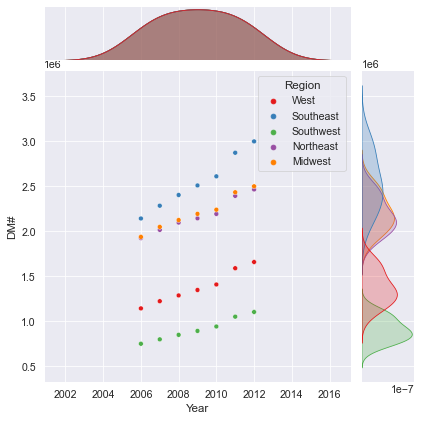

In [63]:
#fig, ax = plt.subplots()
sns.set_context('paper', font_scale=1.2)
sns.jointplot(x='Year', y='DM#', data=cardio_data, hue='Region', kind='scatter', palette='Set1')
sns.despine(left=False)

plt.savefig('../images/DM_Trends.png', dpi=300)
#ax.set_title('# of Individuals with Diabetes Mellitus.')

- Trends in each region of the US for number of Diabetics in Medicare each year from 2006-2012.
- Note that there is an upward trend for all regions

<AxesSubplot:xlabel='Region', ylabel='DM#'>

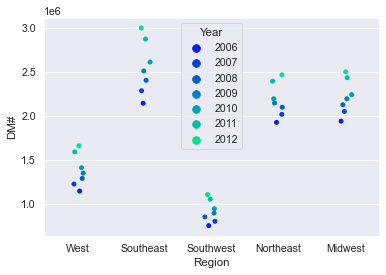

In [56]:
sns.stripplot(x='Region', y='DM#', data=cardio_data, hue='Year', palette='winter')

- Strip plot showing the progressive increase in the number of diabetics over the course of 2006-2012. This is just another visual that can be compared to the each region.
- Note that the Southeast has 3x the number of diabetics compared to the Southwest region.  This data would be more useful if it is normalized to the population density in each US region.

<AxesSubplot:xlabel='Region', ylabel='HA#'>

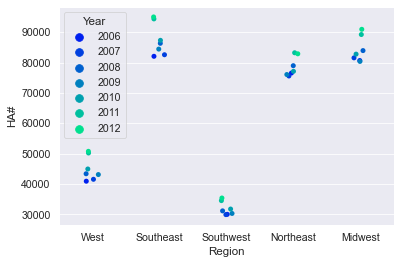

In [57]:
sns.stripplot(x='Region', y='HA#', data=cardio_data, hue='Year', palette='winter')

Heart attack data for each of the regions. Again these show an increasing trend over time year over year.

<AxesSubplot:xlabel='Region', ylabel='AF#'>

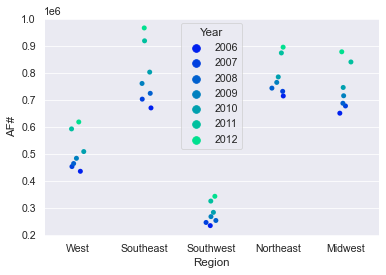

In [58]:
sns.stripplot(x='Region', y='AF#', data=cardio_data, hue='Year', palette='winter')

Atrial Fibrillation data for each of the US regions. The trends hold for each of the regions.

<AxesSubplot:xlabel='Region', ylabel='HF#'>

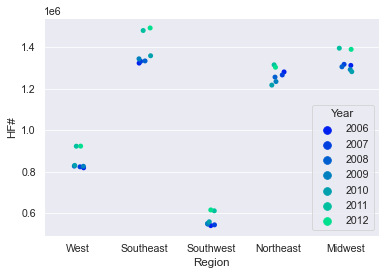

In [59]:
sns.stripplot(x='Region', y='HF#', data=cardio_data, hue='Year', palette='winter')

Heart failure data for each of the US regions. The trends are really hard to find anything notable in this data.

<AxesSubplot:xlabel='Region', ylabel='IHD#'>

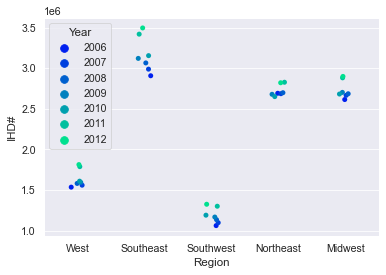

In [60]:
sns.stripplot(x='Region', y='IHD#', data=cardio_data, hue='Year', palette='winter')

Ischemic heart disease follows the same trends...

<AxesSubplot:xlabel='Region', ylabel='STROKE#'>

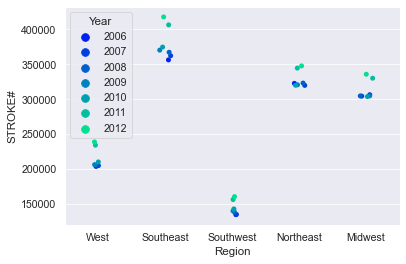

In [61]:
sns.stripplot(x='Region', y='STROKE#', data=cardio_data, hue='Year', palette='winter')

Stroke or Transient Ischemic Attack follow the same trends

<AxesSubplot:xlabel='Region', ylabel='OBES#'>

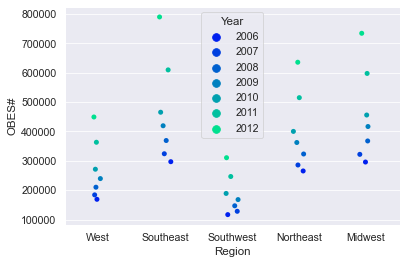

In [62]:
sns.stripplot(x='Region', y='OBES#', data=cardio_data, hue='Year', palette='winter')

Obesity in the difference US regions. Interestingly we do get a larger spread year over year compared to other metrics. Might be worth looking at why the spread is so much bigger.